<h1><b>Data Collection</b></h1>

In [1]:
import pandas as pd
data=pd.read_csv('/home/sonali/Desktop/Project/geolocation/food_coded.csv')

In [2]:
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


Getting Started

In [3]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [4]:
data['employment'] = data['employment'].fillna(4)

In [5]:
data['cook'] = data['cook'].fillna(3)

In [6]:
data['income'] = data['income'].fillna(1)

In [7]:
data['marital_status'] = data['marital_status'].fillna(1)

In [8]:
data['on_off_campus'] = data['on_off_campus'].fillna(1)

In [9]:
data['sports'] = data['sports'].fillna(2)

In [10]:
column= ['Gender', 'cook', 'fav_cuisine_coded', 'eating_out', 'employment', 'fruit_day', 'income', 'marital_status', 'on_off_campus', 'pay_meal_out', 'sports', 'veggies_day']

In [11]:
d=data[column]

In [12]:
d[column].isnull().sum()

Gender               0
cook                 0
fav_cuisine_coded    0
eating_out           0
employment           0
fruit_day            0
income               0
marital_status       0
on_off_campus        0
pay_meal_out         0
sports               0
veggies_day          0
dtype: int64

<h1><b>Data Exploration and Visualisation</b></h1>

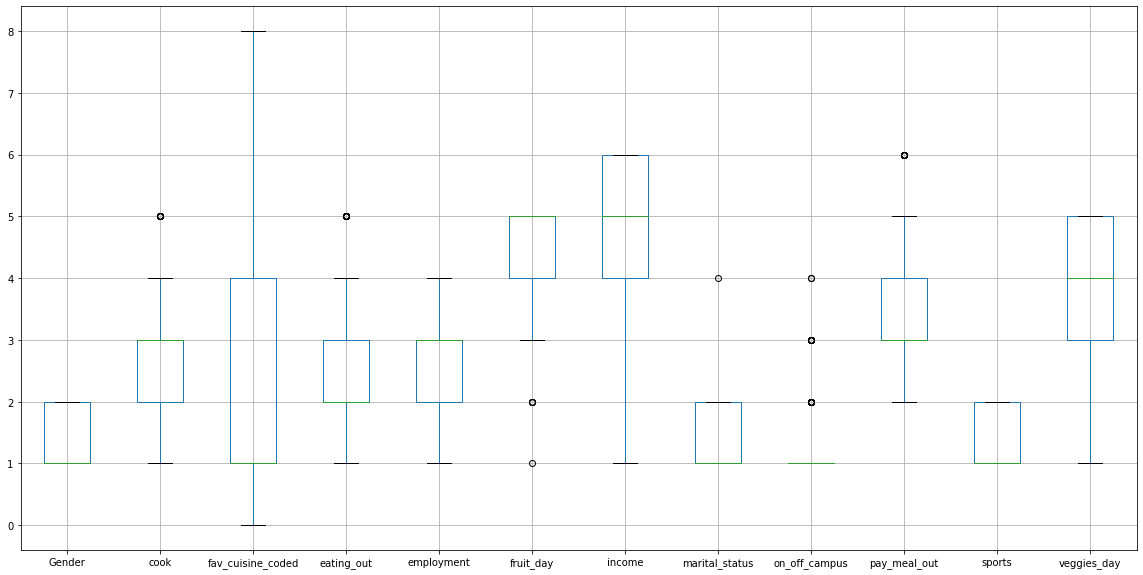

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ax=d.boxplot(figsize=(20,10))

<h1><b>Running KMeans Clustering on the data</b></h1>

In [14]:
#for plotting
import seaborn as sns
#for machine learning
from sklearn import preprocessing, cluster

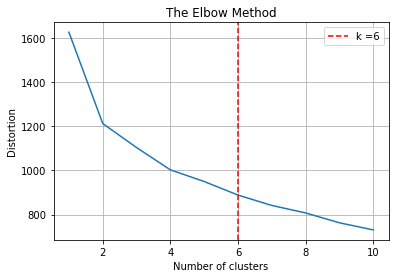

In [15]:
#f = ['income', 'fav_cuisine_coded', 'on_off_campus']
#X = d[f]
X = d
max_k = 10

#iterations
distortions = []
for i in range(1,max_k+1):
    if(len(X)>=i):
        model=cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)

#best k: lowest derivative
k= [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

#plot
fig, ax= plt.subplots()
ax.plot(range(1,len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k ="+str(k))
ax.set(title='The Elbow Method', xlabel= 'Number of clusters', ylabel='Distortion')
ax.legend()
ax.grid(True)
plt.show()

<h1><b>Get Geolocational Data</b></h1>

In [16]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim
import requests
CLIENT_ID= "LQ2HOCU4LSK2IIOGSCD04J4RDEWMX4EFEWBCCFDG32KS3LRX"
CLIENT_SECRET= "L2IBIAQMXWCR5F15NZMBHZNBEBRQBJMX0BDT0FGXU14IFKMU"
VERSION= '20201108'
LIMIT = 10000

In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        12.9716, 77.5946, #Try B'lore's coordinates
        30000,
        LIMIT)


In [18]:
results= requests.get(url).json()

In [19]:
results

{'meta': {'code': 200, 'requestId': '61e019ae98a664431327a565'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '12.971600,77.594600', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 195,
  'suggestedBounds': {'ne': {'lat': 13.241600270000271,
    'lng': 77.87115339086324},
   'sw': {'lat': 12.70159972999973, 'lng': 77.31804660913676}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalIn

In [20]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues

<ipython-input-20-62056a142241>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet,venue.location.neighborhood
0,e-0-51d1245e498ef93fd0e713bb-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d1245e498ef93fd0e713bb,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,"[{'label': 'display', 'lat': 12.97236177249022...",97,...,Bangalore,Karnātaka,India,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131922146,NaN,NaN
1,e-0-4bbc4513e45295217db855a4-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bbc4513e45295217db855a4,Cubbon Park,M G Road,12.977042,77.595277,"[{'label': 'display', 'lat': 12.97704217520378...",610,...,Bangalore,Karnātaka,India,"[M G Road, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN
2,e-0-4b97ad0bf964a5200c0f35e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b97ad0bf964a5200c0f35e3,Harima,"4th Floor, Devatha Plaza",12.967755,77.600073,"[{'label': 'display', 'lat': 12.96775461527832...",731,...,Bangalore,Karnātaka,India,"[4th Floor, Devatha Plaza (Residency Road), Ba...","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,Residency Road,NaN
3,e-0-4bd446b341b9ef3b27a801e6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bd446b341b9ef3b27a801e6,Truffles - Ice & Spice,#22,12.971802,77.601031,"[{'label': 'display', 'lat': 12.97180162235731...",697,...,Bangalore,Karnātaka,India,"[#22 (St. Marks Rd), Bangalore 560001, Karnāta...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,St. Marks Rd,NaN
4,e-0-520390f3498ebe0f1dd63e9e-4,0,"[{'summary': 'This spot is popular', 'type': '...",520390f3498ebe0f1dd63e9e,Smoke House Deli,"52,53",12.971656,77.598254,"[{'label': 'display', 'lat': 12.97165617582342...",396,...,Bangalore,Karnātaka,India,"[52,53 (Lavelle Road), Bangalore 560001, Karnā...","[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",0,[],NaN,Lavelle Road,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4e3eb0dda809ba757c1a3f2e-95,0,"[{'summary': 'This spot is popular', 'type': '...",4e3eb0dda809ba757c1a3f2e,Vivanta by Taj - Yeshwantpur,2275 Tumkur Road,13.029152,77.540565,"[{'label': 'display', 'lat': 13.02915174648597...",8683,...,Bangalore,Karnātaka,India,"[2275 Tumkur Road (Yeshwantpur), Bangalore 560...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,Yeshwantpur,NaN
96,e-0-4fbce60fe4b02a78b2b99fac-96,0,"[{'summary': 'This spot is popular', 'type': '...",4fbce60fe4b02a78b2b99fac,Polar Bear,"8th main, Basaveshwaranagar",12.991461,77.538832,"[{'label': 'display', 'lat': 12.99146100977839...",6440,...,Bangalore,Karnātaka,India,"[8th main, Basaveshwaranagar, Bangalore 560079...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,NaN
97,e-0-51d8034a498e44075a4a92fc-97,0,"[{'summary': 'This spot is popular', 'type': '...",51d8034a498e44075a4a92fc,By 2 coffee,NaN,12.964766,77.538865,"[{'label': 'display', 'lat': 12.96476574177663...",6093,...,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN,NaN
98,e-0-504ca0d6e4b01b58f44fca09-98,0,"[{'summary': 'This spot is popular', 'type': '...",504ca0d6e4b01b58f44fca09,Cafe Noir,Brigade Gateway,13.011400,77.555295,"[{'label': 'display', 'lat': 13.01139977289809...",6148,...,Bangalore,Karnātaka,India,"[Brigade Gateway, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],NaN,NaN,NaN


<h1><b>Adding two more columns Restraurant and Others</b></h1>
<ol>
    <li>Restraurant: Number of Restaurant in the radius of 20km</li>
    <li>Others: Number of Gyms, Parks, etc in the radius of 20km</li>
</ol>

In [21]:
resta=[]
oth=[]
for lat, long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    lat,long,
    1000,
    100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']
    
    g=[]
    for i in range(0,df.size):
        g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
        if i>1:
            co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']= resta
nearby_venues['others']= oth
nearby_venues

<ipython-input-21-98ad66cda1de>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet,venue.location.neighborhood,restaurant,others
0,e-0-51d1245e498ef93fd0e713bb-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d1245e498ef93fd0e713bb,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,"[{'label': 'display', 'lat': 12.97236177249022...",97,...,India,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131922146,NaN,NaN,59,38
1,e-0-4bbc4513e45295217db855a4-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bbc4513e45295217db855a4,Cubbon Park,M G Road,12.977042,77.595277,"[{'label': 'display', 'lat': 12.97704217520378...",610,...,India,"[M G Road, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN,48,31
2,e-0-4b97ad0bf964a5200c0f35e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b97ad0bf964a5200c0f35e3,Harima,"4th Floor, Devatha Plaza",12.967755,77.600073,"[{'label': 'display', 'lat': 12.96775461527832...",731,...,India,"[4th Floor, Devatha Plaza (Residency Road), Ba...","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,Residency Road,NaN,61,39
3,e-0-4bd446b341b9ef3b27a801e6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bd446b341b9ef3b27a801e6,Truffles - Ice & Spice,#22,12.971802,77.601031,"[{'label': 'display', 'lat': 12.97180162235731...",697,...,India,"[#22 (St. Marks Rd), Bangalore 560001, Karnāta...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,St. Marks Rd,NaN,61,39
4,e-0-520390f3498ebe0f1dd63e9e-4,0,"[{'summary': 'This spot is popular', 'type': '...",520390f3498ebe0f1dd63e9e,Smoke House Deli,"52,53",12.971656,77.598254,"[{'label': 'display', 'lat': 12.97165617582342...",396,...,India,"[52,53 (Lavelle Road), Bangalore 560001, Karnā...","[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",0,[],NaN,Lavelle Road,NaN,57,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4e3eb0dda809ba757c1a3f2e-95,0,"[{'summary': 'This spot is popular', 'type': '...",4e3eb0dda809ba757c1a3f2e,Vivanta by Taj - Yeshwantpur,2275 Tumkur Road,13.029152,77.540565,"[{'label': 'display', 'lat': 13.02915174648597...",8683,...,India,"[2275 Tumkur Road (Yeshwantpur), Bangalore 560...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,Yeshwantpur,NaN,6,7
96,e-0-4fbce60fe4b02a78b2b99fac-96,0,"[{'summary': 'This spot is popular', 'type': '...",4fbce60fe4b02a78b2b99fac,Polar Bear,"8th main, Basaveshwaranagar",12.991461,77.538832,"[{'label': 'display', 'lat': 12.99146100977839...",6440,...,India,"[8th main, Basaveshwaranagar, Bangalore 560079...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,NaN,21,4
97,e-0-51d8034a498e44075a4a92fc-97,0,"[{'summary': 'This spot is popular', 'type': '...",51d8034a498e44075a4a92fc,By 2 coffee,NaN,12.964766,77.538865,"[{'label': 'display', 'lat': 12.96476574177663...",6093,...,India,[India],"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN,NaN,14,5
98,e-0-504ca0d6e4b01b58f44fca09-98,0,"[{'summary': 'This spot is popular', 'type': '...",504ca0d6e4b01b58f44fca09,Cafe Noir,Brigade Gateway,13.011400,77.555295,"[{'label': 'display', 'lat': 13.01139977289809...",6148,...,India,"[Brigade Gateway, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],NaN,NaN,NaN,34,28


<h1><b>Changing the Column Name</b></h1>

In [22]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

<h1><b>Install the minisom library using pip</b></h1>

In [23]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


<h1><b>Run K Means clustering on the dataset, with the optimal K value using Elbow Method</b></h1>

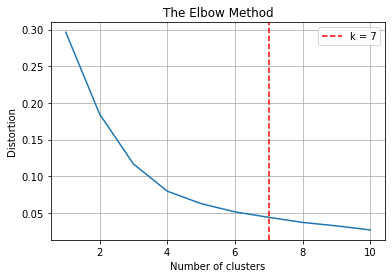

In [24]:
f = ['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10

distortions = []
for i in range(1,max_k+1):
    if len(X) >=i:
        model= cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init= 10, random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1),distortions)
ax.axvline(k,ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [25]:
city="Bengaluru"

locator = Nominatim(user_agent="Geological Analysis")
location = locator.geocode(city)
print(location)

location= [location.latitude, location.longitude]
print("[lat, long]: ",location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]:  [12.9767936, 77.590082]


In [26]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet,venue.location.neighborhood,restaurant,others
0,e-0-51d1245e498ef93fd0e713bb-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d1245e498ef93fd0e713bb,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,"[{'label': 'display', 'lat': 12.97236177249022...",97,...,India,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131922146,NaN,NaN,59,38
1,e-0-4bbc4513e45295217db855a4-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bbc4513e45295217db855a4,Cubbon Park,M G Road,12.977042,77.595277,"[{'label': 'display', 'lat': 12.97704217520378...",610,...,India,"[M G Road, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN,48,31
2,e-0-4b97ad0bf964a5200c0f35e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b97ad0bf964a5200c0f35e3,Harima,"4th Floor, Devatha Plaza",12.967755,77.600073,"[{'label': 'display', 'lat': 12.96775461527832...",731,...,India,"[4th Floor, Devatha Plaza (Residency Road), Ba...","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,Residency Road,NaN,61,39
3,e-0-4bd446b341b9ef3b27a801e6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bd446b341b9ef3b27a801e6,Truffles - Ice & Spice,#22,12.971802,77.601031,"[{'label': 'display', 'lat': 12.97180162235731...",697,...,India,"[#22 (St. Marks Rd), Bangalore 560001, Karnāta...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,St. Marks Rd,NaN,61,39
4,e-0-520390f3498ebe0f1dd63e9e-4,0,"[{'summary': 'This spot is popular', 'type': '...",520390f3498ebe0f1dd63e9e,Smoke House Deli,"52,53",12.971656,77.598254,"[{'label': 'display', 'lat': 12.97165617582342...",396,...,India,"[52,53 (Lavelle Road), Bangalore 560001, Karnā...","[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",0,[],NaN,Lavelle Road,NaN,57,43


In [27]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.venuePage.id', 'venue.location.crossStreet',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

<h1><b>Data Cleaning Process for Extracting Necessary Columns in the Dataset</b></h1>

In [28]:
n = nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'
], axis=1)

In [29]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

<h1><b>New Dataset</b></h1>

In [30]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,12.972362,77.595051,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...",59,38
1,12.977042,77.595277,"[M G Road, Bangalore, Karnātaka, India]",48,31
2,12.967755,77.600073,"[4th Floor, Devatha Plaza (Residency Road), Ba...",61,39
3,12.971802,77.601031,"[#22 (St. Marks Rd), Bangalore 560001, Karnāta...",61,39
4,12.971656,77.598254,"[52,53 (Lavelle Road), Bangalore 560001, Karnā...",57,43
...,...,...,...,...,...
95,13.029152,77.540565,"[2275 Tumkur Road (Yeshwantpur), Bangalore 560...",6,7
96,12.991461,77.538832,"[8th main, Basaveshwaranagar, Bangalore 560079...",21,4
97,12.964766,77.538865,[India],14,5
98,13.011400,77.555295,"[Brigade Gateway, Bangalore, Karnātaka, India]",34,28


<h1><b>Dropping NaN Values from Dataset</b></h1>

In [31]:
n = n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,12.972362,77.595051,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...",59,38
1,12.977042,77.595277,"[M G Road, Bangalore, Karnātaka, India]",48,31
2,12.967755,77.600073,"[4th Floor, Devatha Plaza (Residency Road), Ba...",61,39
3,12.971802,77.601031,"[#22 (St. Marks Rd), Bangalore 560001, Karnāta...",61,39
4,12.971656,77.598254,"[52,53 (Lavelle Road), Bangalore 560001, Karnā...",57,43
...,...,...,...,...,...
95,13.029152,77.540565,"[2275 Tumkur Road (Yeshwantpur), Bangalore 560...",6,7
96,12.991461,77.538832,"[8th main, Basaveshwaranagar, Bangalore 560079...",21,4
97,12.964766,77.538865,[India],14,5
98,13.011400,77.555295,"[Brigade Gateway, Bangalore, Karnātaka, India]",34,28


<h1><b>Convert Every Row of Column 'venue.location.formattedAddress' from List to String</b></h1>

In [32]:
n['venue.location.formattedAddress']

0     [24/1 Vittal Mallya Road, Bangalore 560001, Ka...
1               [M G Road, Bangalore, Karnātaka, India]
2     [4th Floor, Devatha Plaza (Residency Road), Ba...
3     [#22 (St. Marks Rd), Bangalore 560001, Karnāta...
4     [52,53 (Lavelle Road), Bangalore 560001, Karnā...
                            ...                        
95    [2275 Tumkur Road (Yeshwantpur), Bangalore 560...
96    [8th main, Basaveshwaranagar, Bangalore 560079...
97                                              [India]
98       [Brigade Gateway, Bangalore, Karnātaka, India]
99    [Ved Vignan Maha Vidya Peeth (21st Km Kanakapu...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [33]:
spec_chars = ["[","]"]
for char in spec_chars:
    n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, '')

<ipython-input-33-cd2376cf3fc2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, '')


In [34]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,12.972362,77.595051,"'24/1 Vittal Mallya Road', 'Bangalore 560001',...",59,38
1,12.977042,77.595277,"'M G Road', 'Bangalore', 'Karnātaka', 'India'",48,31
2,12.967755,77.600073,"'4th Floor, Devatha Plaza (Residency Road)', '...",61,39
3,12.971802,77.601031,"'#22 (St. Marks Rd)', 'Bangalore 560001', 'Kar...",61,39
4,12.971656,77.598254,"'52,53 (Lavelle Road)', 'Bangalore 560001', 'K...",57,43
...,...,...,...,...,...
95,13.029152,77.540565,"'2275 Tumkur Road (Yeshwantpur)', 'Bangalore 5...",6,7
96,12.991461,77.538832,"'8th main, Basaveshwaranagar', 'Bangalore 5600...",21,4
97,12.964766,77.538865,'India',14,5
98,13.011400,77.555295,"'Brigade Gateway', 'Bangalore', 'Karnātaka', '...",34,28


<h1><b>Plot the clustered locations on a map</b></h1>

In [35]:
x, y = "lat" , "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
                data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)

data.apply(lambda row: folium.CircleMarker(
            location=[row[x],row[y]],popup=row[popup],
            radius=row['size']).add_to(map_),axis=1)

map_

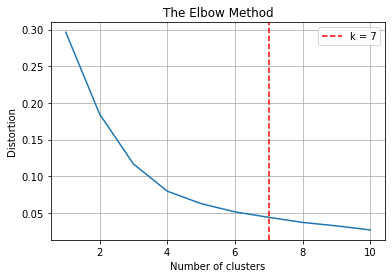

In [36]:
X = n[["lat","long"]]
max_k = 10
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
        model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

fig, ax = plt.subplots()
ax.plot(range(1,len(distortions)+1),distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel = 'Number of clusters',
      ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [46]:
import scipy


k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]

dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1

n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

/home/sonali/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,12.972362,77.595051,"'24/1 Vittal Mallya Road', 'Bangalore 560001',...",59,38,0,0
1,12.977042,77.595277,"'M G Road', 'Bangalore', 'Karnātaka', 'India'",48,31,0,0
2,12.967755,77.600073,"'4th Floor, Devatha Plaza (Residency Road)', '...",61,39,0,0
3,12.971802,77.601031,"'#22 (St. Marks Rd)', 'Bangalore 560001', 'Kar...",61,39,0,0
4,12.971656,77.598254,"'52,53 (Lavelle Road)', 'Bangalore 560001', 'K...",57,43,0,0
...,...,...,...,...,...,...,...
95,13.029152,77.540565,"'2275 Tumkur Road (Yeshwantpur)', 'Bangalore 5...",6,7,2,0
96,12.991461,77.538832,"'8th main, Basaveshwaranagar', 'Bangalore 5600...",21,4,2,0
97,12.964766,77.538865,'India',14,5,5,0
98,13.011400,77.555295,"'Brigade Gateway', 'Bangalore', 'Karnātaka', '...",34,28,2,0


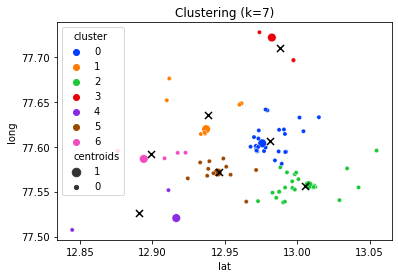

In [47]:
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [48]:
model = cluster.AffinityPropagation()

Text(0.5, 1.0, 'Clustering (k=7)')

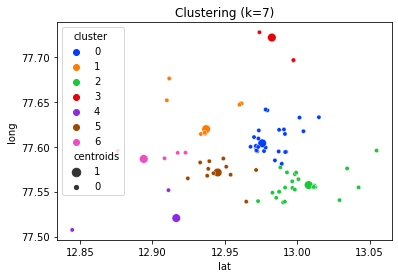

In [49]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [50]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()

lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)

legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)

map_

<h2>END</h2>